In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from env import user,password,host
import os
import wrangle
import explore
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import warnings
warnings.filterwarnings("ignore")

# 1. Load your zillow dataset.

In [2]:
# get data
df = wrangle.get_zillow_data()
# prep
df = wrangle.wrangle_zillow(df)
# split
train, validate, test = wrangle.split_data(df)

csv file found and loaded

train -> (1219902, 7), 60.0%
validate -> (406635, 7),20.0%
test -> (406635, 7), 20.0%


In [3]:
train = train.sample(n=10000,random_state=123)

# 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
train.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
662794,2,1.0,980,522302,1955,5991.50,LA
1459121,3,2.0,1600,297116,1938,3645.70,LA
1082642,2,1.0,1040,67042,1964,1469.16,LA
59324,3,2.0,1588,422021,1924,5161.67,LA
2013330,3,2.0,1447,384362,1975,4504.42,Ventura


In [6]:
# make it
lr = LinearRegression()

# fit it to training data
lr.fit(train[['area']], train.taxvalue)

# use it
# we will use lr.predict to make predictions 
lr.predict(train[['area']])

array([228021.09957378, 337452.72300626, 238611.25668015, ...,
       507424.74456349, 375224.28335231, 279559.86415811])

In [7]:
#lets put the predictions in the train
train['yhat'] = lr.predict(train[['taxvalue']])

In [8]:
train.taxvalue.max()

1200000

# 3. Plot the residuals for the linear regression model that you made.

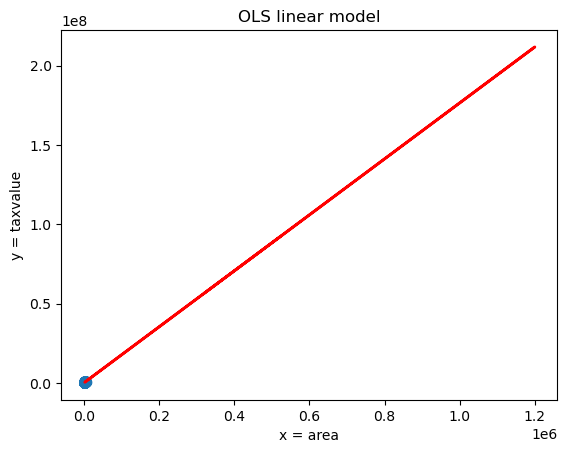

In [9]:
# visualize the line of best fit from OLS linear model

#scatter is my actuals
plt.scatter(train.area, train.taxvalue)

#lineplot is my regression line
plt.plot(train.taxvalue, train.yhat, color='red', linewidth=2)


plt.xlabel('x = area')
plt.ylabel('y = taxvalue')
plt.title('OLS linear model')
plt.show()

In [10]:
#calculate mean
baseline = train.taxvalue.mean()
baseline

363801.9164

In [11]:
#add it to the df
train['baseline'] = baseline
train.head(2)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,yhat,baseline
662794,2,1.0,980,522302,1955,5991.5,LA,9.224272e+07,363801.9164
1459121,3,2.0,1600,297116,1938,3645.7,LA,5.249680e+07,363801.9164


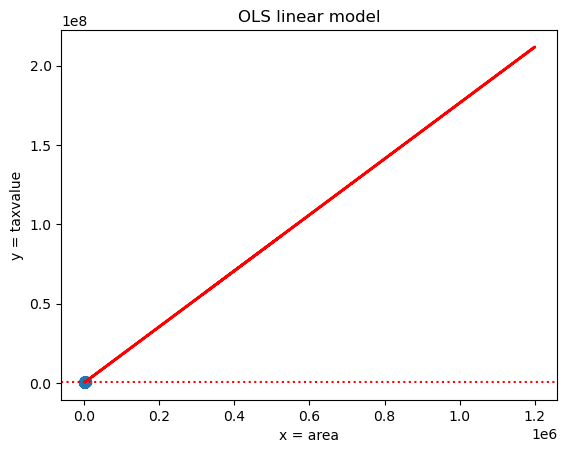

In [12]:
# visualize the line of best fit from OLS linear model

#scatter is my actuals
plt.scatter(train.area, train.taxvalue)

#lineplot is my regression line
plt.plot(train.taxvalue, train.yhat, color='red', linewidth=2)
plt.axhline(baseline, ls=':', color='red')
plt.xlabel('x = area')
plt.ylabel('y = taxvalue')
plt.title('OLS linear model')
plt.show()

# 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.


In [13]:
print('Answer')
print("SSE:", SSE) 
print("ESS:", ESS)
print('TSS:', TSS)
print("MSE:", MSE) 
print("RMSE:", RMSE) 

Answer


NameError: name 'SSE' is not defined

# 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [ ]:
print('Answer for Baseline')
print("SSE:", SSE_baseline) 
print("ESS:", ESS_baseline)
print('TSS:', TSS_baseline)
print("MSE:", MSE_baseline) 
print("RMSE:", RMSE_baseline) 

## MSE: mean squared error

In [ ]:
#import sklearn mean_square_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [ ]:
MSE_baseline = mean_squared_error(train.taxvalue, train.baseline)
MSE = mean_squared_error(train.taxvalue, train.yhat)

In [ ]:
print("MSE baseline:", MSE_baseline) 
print("MSE:", MSE) 

## SSE: sum of squared errors

In [ ]:
SSE_baseline = MSE_baseline * len(train)
SSE = MSE * len(train)

In [ ]:
print("SSE baseline:" ,SSE_baseline) 
print("SSE:", SSE) 

## RMSE: root mean squared error

In [ ]:
RMSE_baseline = MSE_baseline **.5
RMSE = MSE ** .5

In [ ]:
print("RMSE baseline" ,RMSE_baseline)
print("RMSE", RMSE) 

## ESS: explained sum of squares

In [ ]:
# compute explained sum of squares
ESS = sum((train.yhat - train.taxvalue.mean())**2)
ESS_baseline = sum((train.baseline - train.taxvalue.mean()) **2)
print("ESS_baseline", ESS_baseline)
print("ESS", ESS)

## TSS: total sum of squares

In [ ]:
TSS_baseline = ESS_baseline + SSE_baseline
TSS = ESS + SSE
print('TSS_baseline', TSS_baseline)
print('TSS', TSS)

In [ ]:
## All in one
#MSE
MSE_baseline = mean_squared_error(train.taxvalue, train.baseline)
MSE = mean_squared_error(train.taxvalue, train.yhat)
#SSE
SSE_baseline = MSE_baseline * len(train)
SSE = MSE * len(train)
#RMSE
RMSE_baseline = MSE_baseline **.5
RMSE = MSE ** .5
#ESS
ESS = sum((train.yhat - train.taxvalue.mean())**2)
ESS_baseline = sum((train.baseline - train.taxvalue.mean()) **2)
#TSS
TSS_baseline = ESS_baseline + SSE_baseline
TSS = ESS + SSE
#print all
print("MSE baseline:", MSE_baseline) 
print("MSE:", MSE) 
print("SSE baseline:" ,SSE_baseline) 
print("SSE:", SSE) 
print("RMSE baseline" ,RMSE_baseline)
print("RMSE", RMSE) 
print("ESS_baseline", ESS_baseline)
print("ESS", ESS)
print('TSS_baseline', TSS_baseline)
print('TSS', TSS)

# 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [ ]:
if SSE_baseline > SSE:
    print('model performs better than baseline')
else:
    print('model does not perform better than baseline')

# 7. What is the amount of variance explained in your model?

In [ ]:
# sklearn.metrics.explained_variance_score

evs = explained_variance_score(train.taxvalue, train.yhat)
print('Explained Variance = ', round(evs,3))


# 8. Is your model better than the baseline model?

In [ ]:
# Yes,  my model performs better than the baseline model

# 9. Create a file named evaluate.py that contains the following functions.

* plot_residuals(y, yhat): creates a residual plot
* regression_errors(y, yhat): returns the following values:
* sum of squared errors (SSE)
* explained sum of squares (ESS)
* total sum of squares (TSS)
* mean squared error (MSE)
* root mean squared error (RMSE)
* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_residuals(y, yhat):
    residuals = y - yhat
    plt.scatter(yhat, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

def regression_errors(y, yhat):
    SSE = np.sum((y - yhat) ** 2)
    ESS = np.sum((yhat - np.mean(y)) ** 2)
    TSS = np.sum((y - np.mean(y)) ** 2)
    MSE = SSE / len(y)
    RMSE = np.sqrt(MSE)
    return SSE, ESS, TSS, MSE, RMSE

def baseline_mean_errors(y):
    baseline_prediction = np.mean(y)
    SSE = np.sum((y - baseline_prediction) ** 2)
    MSE = SSE / len(y)
    RMSE = np.sqrt(MSE)
    return SSE, MSE, RMSE

def better_than_baseline(y, yhat):
    SSE_model, _, _, _, _ = regression_errors(y, yhat)
    SSE_baseline, _, _ = baseline_mean_errors(y)
    return SSE_model < SSE_baseline


In [ ]:
#from evaluate import *

# Example usage
y = np.array([1, 2, 3, 4, 5])
yhat = np.array([1.2, 1.8, 3.2, 3.9, 4.6])

plot_residuals(y, yhat)

SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
print("SSE:", SSE)
print("ESS:", ESS)
print("TSS:", TSS)
print("MSE:", MSE)
print("RMSE:", RMSE)

SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
print("Baseline SSE:", SSE_baseline)
print("Baseline MSE:", MSE_baseline)
print("Baseline RMSE:", RMSE_baseline)

if better_than_baseline(y, yhat):
    print("The model performs better than the baseline.")
else:
    print("The model does not perform better than the baseline.")


In [ ]:
y= train.taxvalue
yhat=train.yhat

plot_residuals(y,yhat)
residuals = y - yhat
plt.scatter(yhat, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
def evaluate(y,yhat):
    '''
    all in one funct to return:
    plot_residuals(y, yhat): creates a residual plot
    regression_errors(y, yhat): returns the following values:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
    baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
    '''
    # plot residuals
    plot_residuals(y, yhat)
    
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    print("SSE:", SSE)
    print("ESS:", ESS)
    print("TSS:", TSS)
    print("MSE:", MSE)
    print("RMSE:", RMSE)
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    print("Baseline SSE:", SSE_baseline)
    print("Baseline MSE:", MSE_baseline)
    print("Baseline RMSE:", RMSE_baseline)
    
    if better_than_baseline(y, yhat):
        print("The model performs better than the baseline.")
    else:
        print("The model does not perform better than the baseline.")

In [ ]:
evaluate(train.taxvalue,train.yhat)

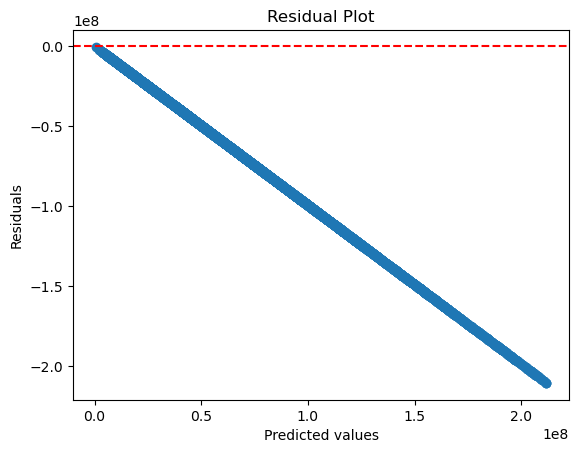

In [15]:
explore.plot_residuals(train.taxvalue,train.yhat)